## 전처리 & EDA

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [88]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

### links

In [49]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [50]:
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [51]:
links.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


### movies

In [52]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
movies.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


### ratings

In [55]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [56]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [57]:
ratings.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


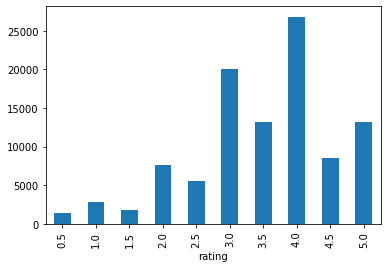

In [58]:
ratings.groupby('rating').size().plot(kind='bar')

평점 4가 가장 많고 그다음으로 3, 5 순이다

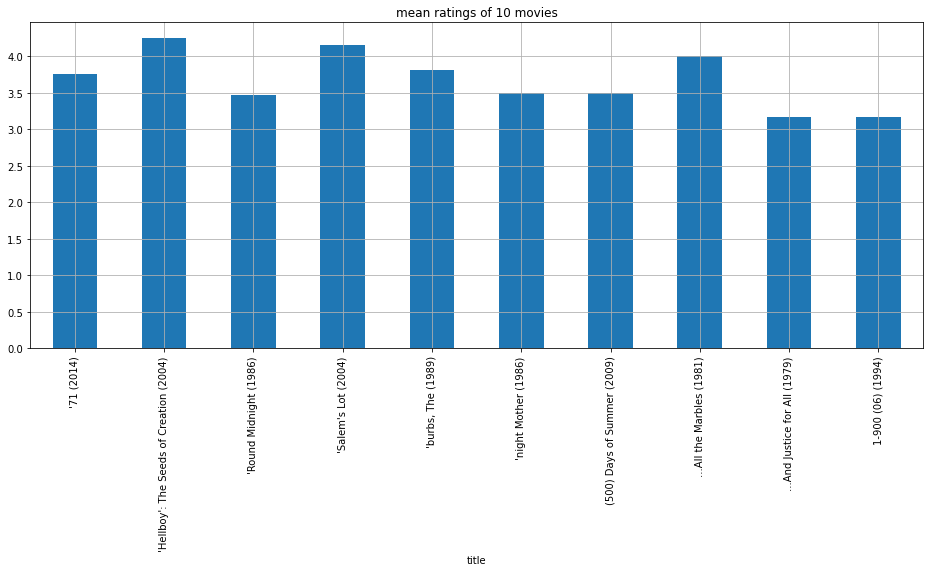

In [59]:
movie_means = ratings.join(movies['title'], on='movieId').groupby('title').rating.mean()
movie_means[:10].plot(kind='bar', grid=True, figsize=(16,6), title="mean ratings of 10 movies")

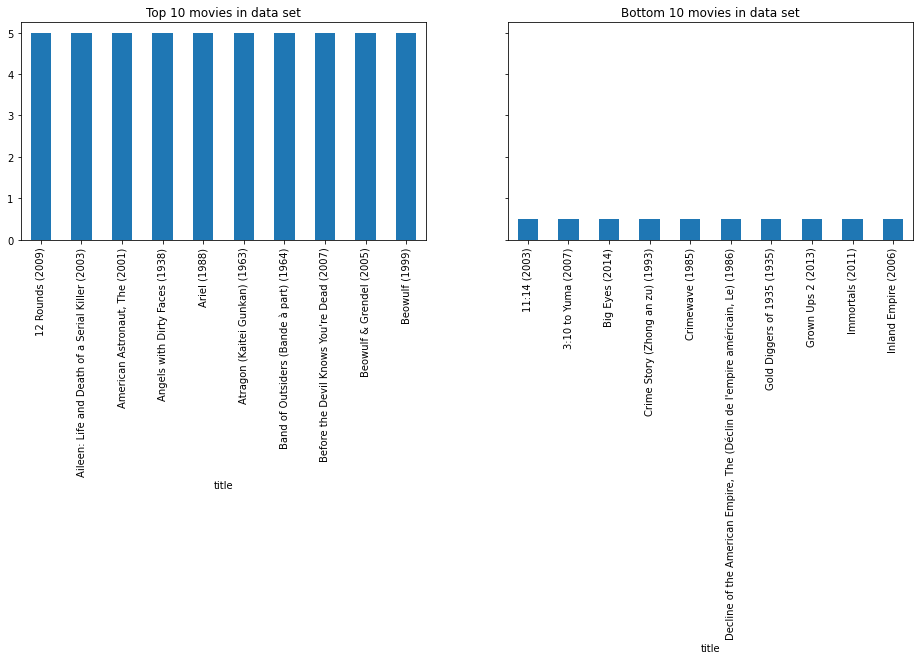

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4), sharey=True)
movie_means.nlargest(10).plot(kind='bar', ax=ax1, title="Top 10 movies in data set");
movie_means.nsmallest(10).plot(kind='bar', ax=ax2, title="Bottom 10 movies in data set");

### tags

In [61]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [62]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [63]:
tags.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


> Surprise 라이브러리는 'user-item-rating' 변수명 순서를 따른다. 따라서 ratings data 사용<BR>
Surprise 모듈에서 csv파일을 읽어오도록 포맷을 변경해주어야 하기 위해서 따로 저장<BR>
이 때, index값과 Header(칼럼명)값들 없애주면서 저장시키기



In [89]:
ratings.to_csv('ratings_surprise.csv', index=False, header=False)

In [70]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633968 sha256=f2f80b8c33bce1bb99aa72cfa2671915436d5bcbe3f6d956a938331366cf9cf6
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [128]:
from surprise import Reader, Dataset, KNNBasic, SVD, accuracy,SVDpp
from surprise.model_selection import train_test_split, cross_validate
from surprise.dataset import DatasetAutoFolds

In [93]:
reader = Reader(line_format='user item rating timestamp', sep=',')
data = Dataset.load_from_file('ratings_surprise.csv',reader=reader)
train, test = train_test_split(data, test_size=0.3,
                              random_state=42)

## Model Based

SVD

In [102]:
algo = SVD()
algo.fit(train)

In [103]:
prediction = algo.test(test)
prediction[:5]

[Prediction(uid='217', iid='1287', r_ui=3.0, est=3.2643617846918747, details={'was_impossible': False}),
 Prediction(uid='594', iid='7032', r_ui=4.0, est=3.962310640998359, details={'was_impossible': False}),
 Prediction(uid='117', iid='697', r_ui=3.0, est=3.3154166932013145, details={'was_impossible': False}),
 Prediction(uid='610', iid='43928', r_ui=2.0, est=3.1438880443138895, details={'was_impossible': False}),
 Prediction(uid='414', iid='3986', r_ui=1.5, est=2.9631659123884733, details={'was_impossible': False})]

In [105]:
# user id, item id, 예측평점값 순서
result = [(pred.uid, pred.iid, pred.est) for pred in prediction[:5]]
result

[('217', '1287', 3.2643617846918747),
 ('594', '7032', 3.962310640998359),
 ('117', '697', 3.3154166932013145),
 ('610', '43928', 3.1438880443138895),
 ('414', '3986', 2.9631659123884733)]

In [107]:
accuracy.rmse(prediction)

RMSE: 0.8814


0.8814258319469898

In [141]:
def get_unseen_surprise(ratings, movies, userId):
    # 특정 유저가 본 movie id
    seen_movies = ratings[ratings['userId']==userId]['movieId'].tolist()
    # 모든 영화들의 movie id
    total_movies = movies['movieId'].tolist()
    
    # 특정 유저가 안 본 영화
    unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
    print(f'특정 {userId}번 유저가 본 영화 수: {len(seen_movies)}\n추천한 영화 개수: {len(unseen_movies)}\n전체 영화수: {len(total_movies)}')
    
    return unseen_movies

def recomm_movie_by_surprise(a, userId, unseen_movies, top_n=10):
    # 특정 유저가 안 본 영화 평점 예측
    predictions = [a.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    
    def sortkey_est(pred):
        return pred.est
    
    predictions.sort(key=sortkey_est, reverse=True)
    # 상위 n개의 예측값들만 할당
    top_predictions = predictions[:top_n]
    
    # top_predictions에서 movie id, rating, movie title 뽑아내기
    top_movie_ids = [int(pred.iid) for pred in top_predictions]
    top_movie_ratings = [pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    top_movie_preds = [(ids, rating, title) for ids, rating, title in zip(top_movie_ids, top_movie_ratings, top_movie_titles)]
    
    return top_movie_preds

### 추천 영화들 출력해보기
unseen_lst = get_unseen_surprise(ratings, movies, 20)
top_movies_preds = recomm_movie_by_surprise(algo, 20, unseen_lst,
                                           top_n=10)
print()
print('#'*8,'Top-10 추천영화 리스트','#'*8)

for top_movie in top_movies_preds:
    print('* 추천 영화 이름: ', top_movie[2])
    print('* 해당 영화의 예측평점: ', top_movie[1])
    print()

특정 20번 유저가 본 영화 수: 242
추천한 영화 개수: 9500
전체 영화수: 9742

######## Top-10 추천영화 리스트 ########
* 추천 영화 이름:  Usual Suspects, The (1995)
* 해당 영화의 예측평점:  4.738434052628181

* 추천 영화 이름:  Star Wars: Episode IV - A New Hope (1977)
* 해당 영화의 예측평점:  4.646403606428318

* 추천 영화 이름:  Shawshank Redemption, The (1994)
* 해당 영화의 예측평점:  4.642550511783382

* 추천 영화 이름:  Godfather, The (1972)
* 해당 영화의 예측평점:  4.585092333364295

* 추천 영화 이름:  Rear Window (1954)
* 해당 영화의 예측평점:  4.575689283138322

* 추천 영화 이름:  Some Like It Hot (1959)
* 해당 영화의 예측평점:  4.517225114748781

* 추천 영화 이름:  Streetcar Named Desire, A (1951)
* 해당 영화의 예측평점:  4.489012863712078

* 추천 영화 이름:  Life Is Beautiful (La Vita è bella) (1997)
* 해당 영화의 예측평점:  4.485527130833906

* 추천 영화 이름:  Eternal Sunshine of the Spotless Mind (2004)
* 해당 영화의 예측평점:  4.45694023690252

* 추천 영화 이름:  Harry Potter and the Prisoner of Azkaban (2004)
* 해당 영화의 예측평점:  4.455957685422121



SVDpp

In [137]:
algop = SVDpp()
algop.fit(train)
prediction = algop.test(test)
prediction[:5]
result = [(pred.uid, pred.iid, pred.est) for pred in prediction[:5]]
accuracy.rmse(prediction)

RMSE: 0.8699


0.8698976247328651

In [140]:
### 추천 영화들 출력해보기
unseen_lst = get_unseen_surprise(ratings, movies, 20)
top_movies_preds = recomm_movie_by_surprise(algop, 20, unseen_lst,
                                           top_n=10)
print()
print('#'*8,'Top-10 추천영화 리스트','#'*8)

for top_movie in top_movies_preds:
    print('* 추천 영화 이름: ', top_movie[2])
    print('* 해당 영화의 예측평점: ', top_movie[1])
    print()

특정 20번 유저가 본 영화 수: 242
추천한 영화 개수: 9500
전체 영화수: 9742

######## Top-10 추천영화 리스트 ########
* 추천 영화 이름:  Usual Suspects, The (1995)
* 해당 영화의 예측평점:  4.886062088112503

* 추천 영화 이름:  Star Wars: Episode IV - A New Hope (1977)
* 해당 영화의 예측평점:  4.8164370476180824

* 추천 영화 이름:  Pulp Fiction (1994)
* 해당 영화의 예측평점:  4.759785947641002

* 추천 영화 이름:  Shawshank Redemption, The (1994)
* 해당 영화의 예측평점:  4.676709160523394

* 추천 영화 이름:  Forrest Gump (1994)
* 해당 영화의 예측평점:  4.668860703804261

* 추천 영화 이름:  Silence of the Lambs, The (1991)
* 해당 영화의 예측평점:  4.640247267061697

* 추천 영화 이름:  Godfather, The (1972)
* 해당 영화의 예측평점:  4.615378813062678

* 추천 영화 이름:  Cinema Paradiso (Nuovo cinema Paradiso) (1989)
* 해당 영화의 예측평점:  4.610841452686089

* 추천 영화 이름:  Princess Bride, The (1987)
* 해당 영화의 예측평점:  4.607020153331343

* 추천 영화 이름:  Dancer in the Dark (2000)
* 해당 영화의 예측평점:  4.600035595192554



## Memory Based

User-based KNN

In [119]:
sim_options = {
    'name': 'MSD',
    'user_based': 'True'
}

uk = KNNBasic(sim_options = sim_options)
cross_validate(uk, data, measures=['MAE'], cv=5, verbose=True)
uk.fit(train)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7250  0.7181  0.7267  0.7308  0.7286  0.7259  0.0043  
Fit time          0.17    0.19    0.17    0.25    0.21    0.20    0.03    
Test time         1.82    2.55    1.64    1.93    1.70    1.93    0.32    
Computing the msd similarity matrix...
Done computing similarity matrix.


In [120]:
prediction = uk.test(test)
result = [(pred.uid, pred.iid, pred.est) for pred in prediction[:5]]

In [121]:
accuracy.rmse(prediction)

RMSE: 0.9568


0.956834083398565

In [122]:
### 추천 영화들 출력해보기
unseen_lst = get_unseen_surprise(ratings, movies, 20)
top_movies_preds = recomm_movie_by_surprise(uk, 20, unseen_lst,
                                           top_n=10)
print()
print('#'*8,'Top-10 추천영화 리스트','#'*8)

for top_movie in top_movies_preds:
    print('* 추천 영화 이름: ', top_movie[2])
    print('* 해당 영화의 예측평점: ', top_movie[1])
    print()

특정 20번 유저가 본 영화 수: 242
추천한 영화 개수: 9500
전체 영화수: 9742

######## Top-10 추천영화 리스트 ########
* 추천 영화 이름:  Heidi Fleiss: Hollywood Madam (1995)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Live Nude Girls (1995)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  In the Realm of the Senses (Ai no corrida) (1976)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Orlando (1992)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Denise Calls Up (1995)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Song of the Little Road (Pather Panchali) (1955)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  It's My Party (1996)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Supercop 2 (Project S) (Chao ji ji hua) (1993)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Trees Lounge (1996)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Hype! (1996)
* 해당 영화의 예측평점:  5



Item-based KNN

In [123]:
sim_options = {
    'name': 'pearson',
    'user_based': 'False'
}

ik = KNNBasic(sim_options = sim_options)
cross_validate(ik, data, measures=['MAE'], cv=5, verbose=True)
ik.fit(train)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7548  0.7508  0.7481  0.7530  0.7540  0.7521  0.0024  
Fit time          1.08    0.89    1.00    0.64    0.63    0.85    0.18    
Test time         1.66    2.13    2.86    1.81    2.35    2.16    0.42    
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [124]:
prediction = ik.test(test)
result = [(pred.uid, pred.iid, pred.est) for pred in prediction[:5]]

In [125]:
accuracy.rmse(prediction) # accuracy 가장 높음!

RMSE: 0.9828


0.9828180375407677

In [126]:
### 추천 영화들 출력해보기
unseen_lst = get_unseen_surprise(ratings, movies, 20)
top_movies_preds = recomm_movie_by_surprise(ik, 20, unseen_lst,
                                           top_n=10)
print()
print('#'*8,'Top-10 추천영화 리스트','#'*8)

for top_movie in top_movies_preds:
    print('* 추천 영화 이름: ', top_movie[2])
    print('* 해당 영화의 예측평점: ', top_movie[1])
    print()

특정 20번 유저가 본 영화 수: 242
추천한 영화 개수: 9500
전체 영화수: 9742

######## Top-10 추천영화 리스트 ########
* 추천 영화 이름:  Angels and Insects (1995)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Heidi Fleiss: Hollywood Madam (1995)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  New Jersey Drive (1995)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  In the Realm of the Senses (Ai no corrida) (1976)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Orlando (1992)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Denise Calls Up (1995)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Supercop 2 (Project S) (Chao ji ji hua) (1993)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Halloween: The Curse of Michael Myers (Halloween 6: The Curse of Michael Myers) (1995)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  Mother Night (1996)
* 해당 영화의 예측평점:  5

* 추천 영화 이름:  My Man Godfrey (1936)
* 해당 영화의 예측평점:  5

